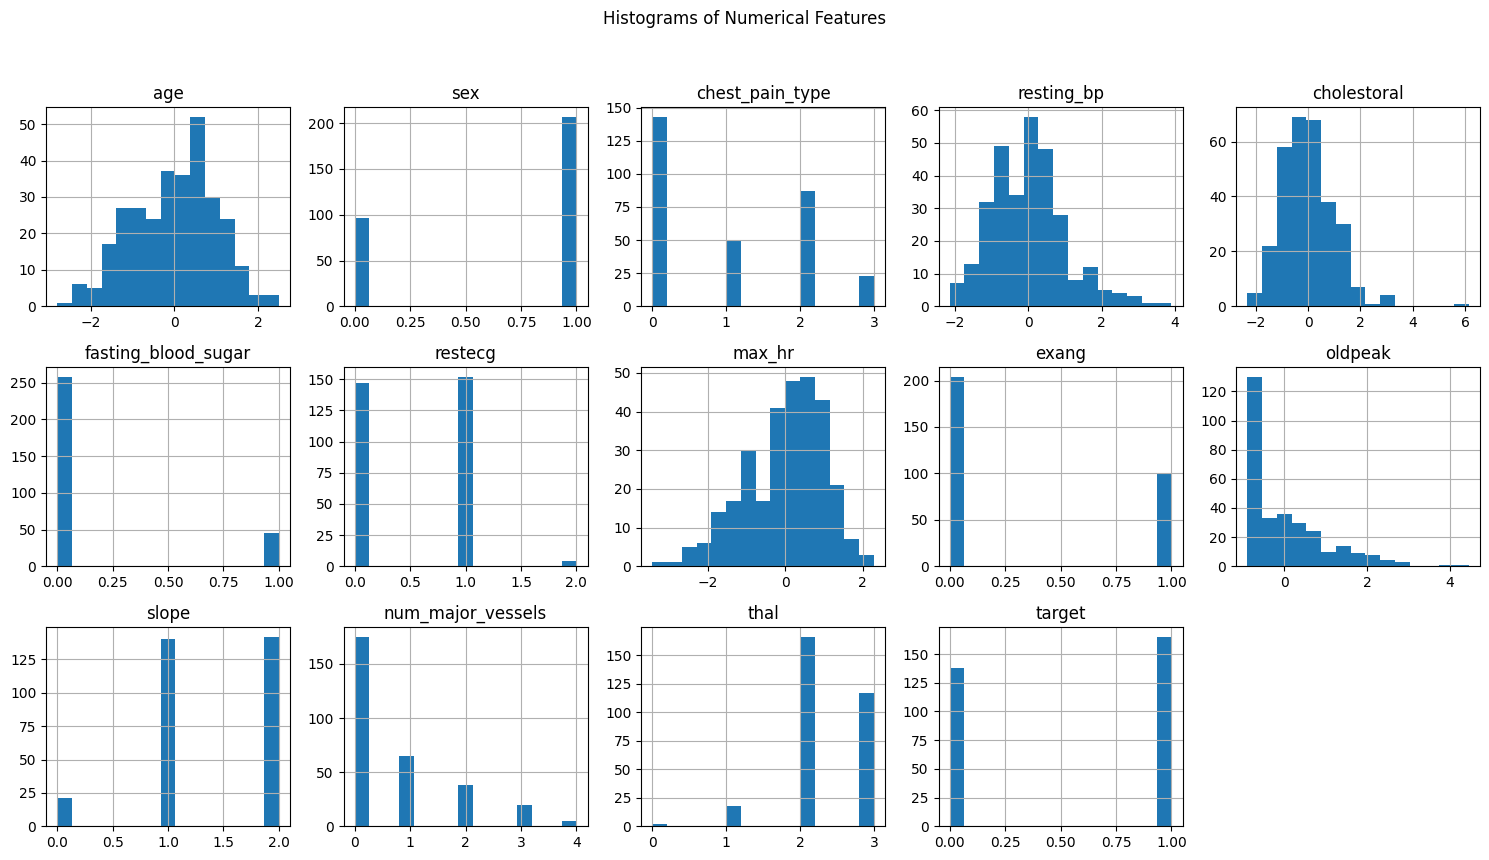

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'processed_heart.csv'  
data = pd.read_csv(file_path)

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
num_features = len(numerical_features)

# Determine the layout size
n_rows = int(np.ceil(num_features / 5))  
data[numerical_features].hist(bins=15, figsize=(15, n_rows * 3), layout=(n_rows, 5))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



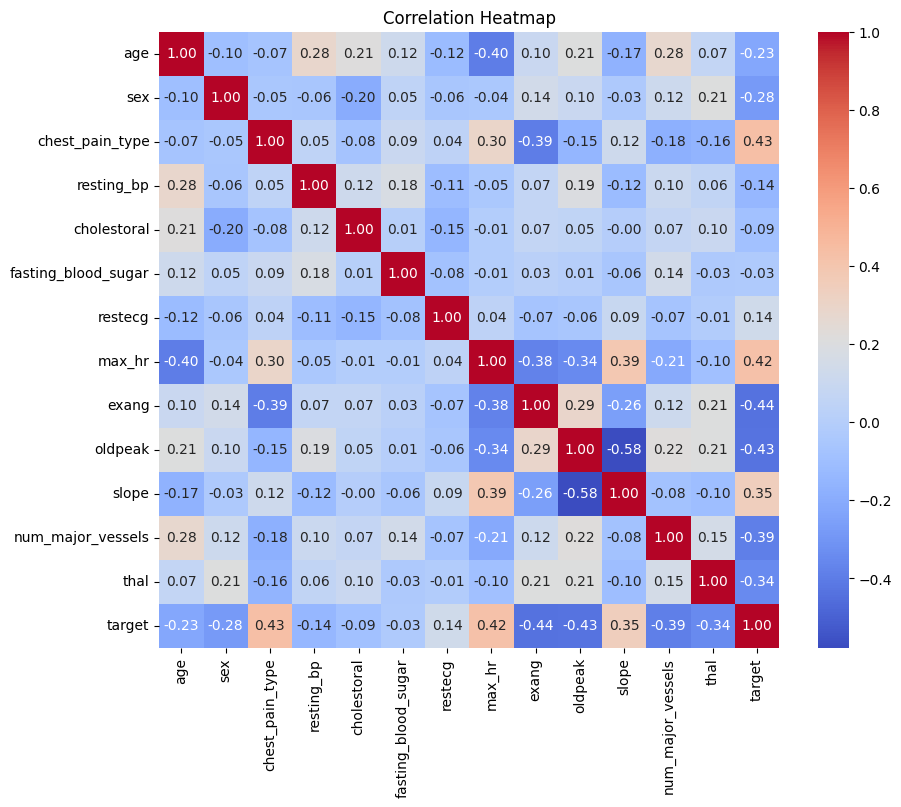

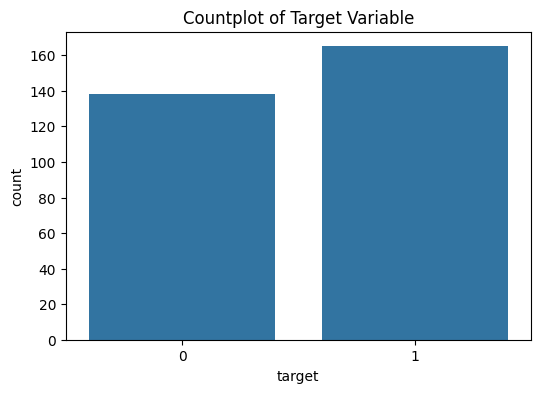

In [4]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Countplot of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Countplot of Target Variable')
plt.show()


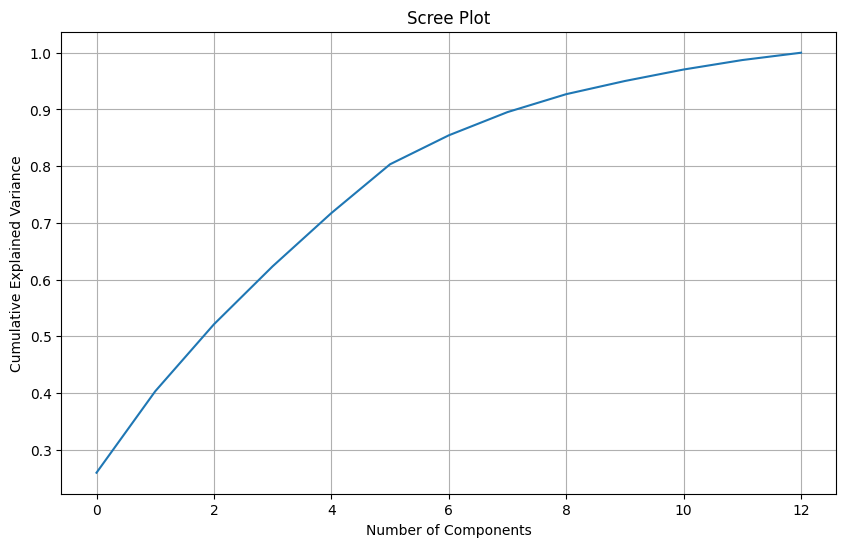

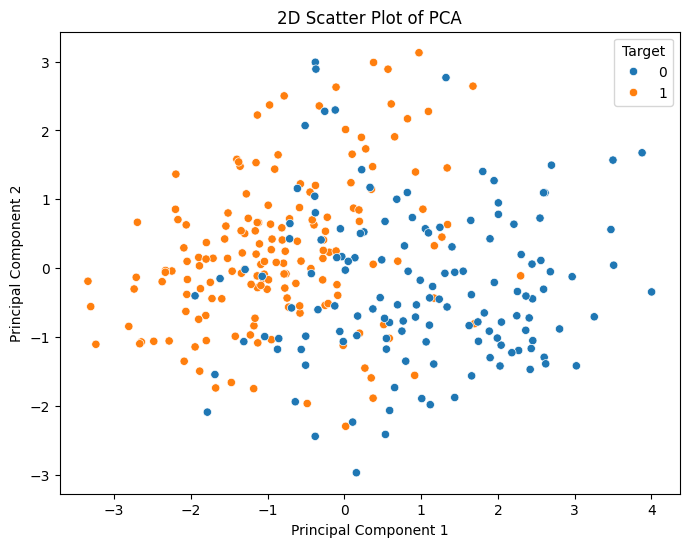

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

X = data.drop('target', axis=1)
y = data['target']

# Applying PCA
pca = PCA(n_components=None)  # None: all components are kept
X_pca = pca.fit_transform(X)

# Creating a DataFrame for the first few principal components and the target
pca_df = pd.DataFrame(X_pca[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Target'] = y

# 1. Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 2. 2D Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA')
plt.legend(title='Target')
plt.show()


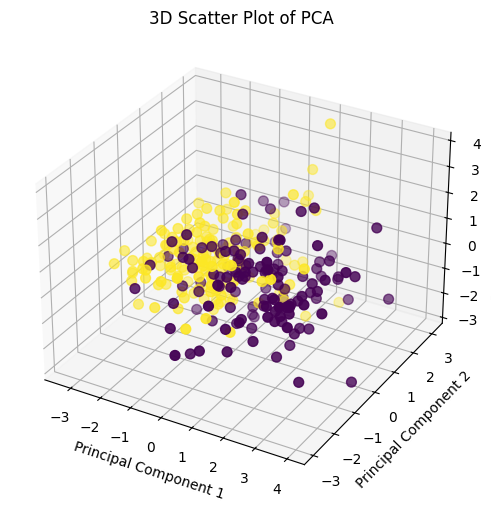

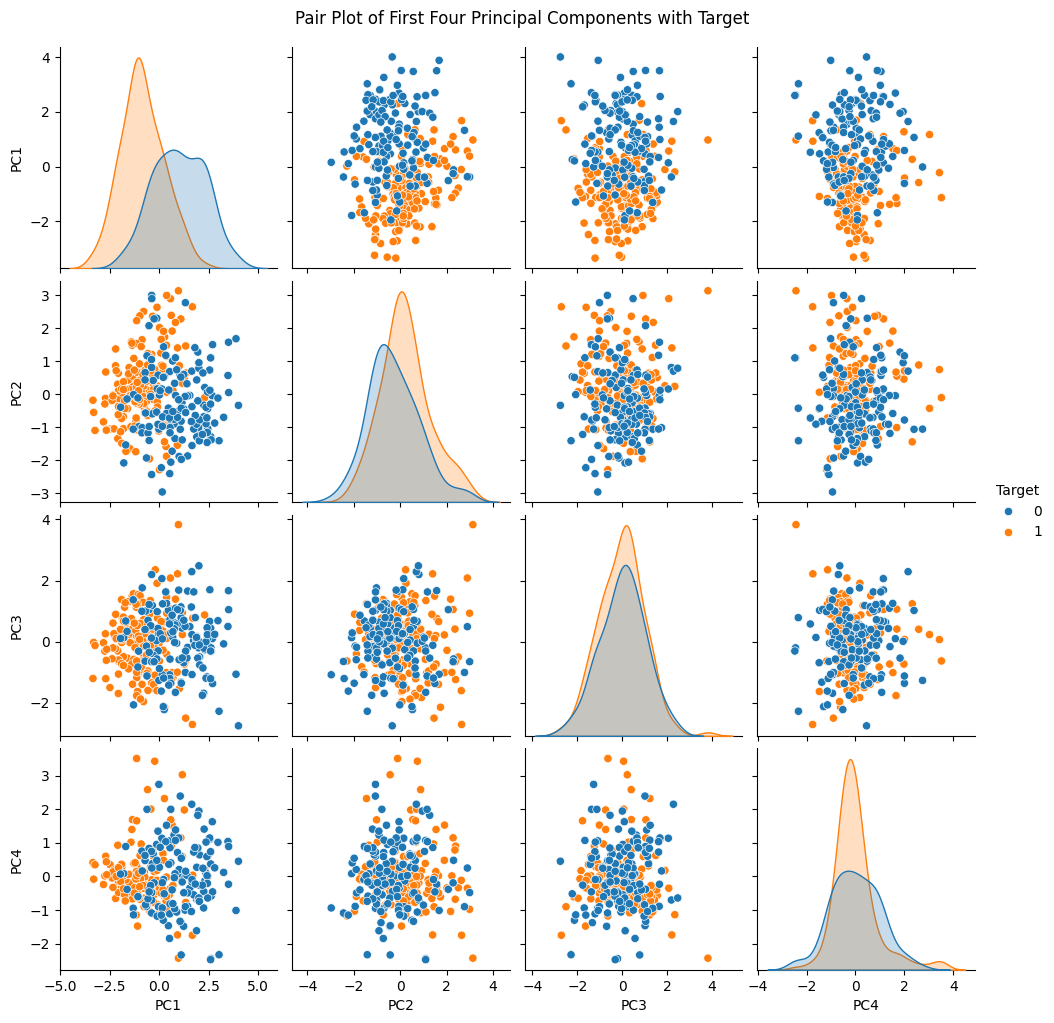

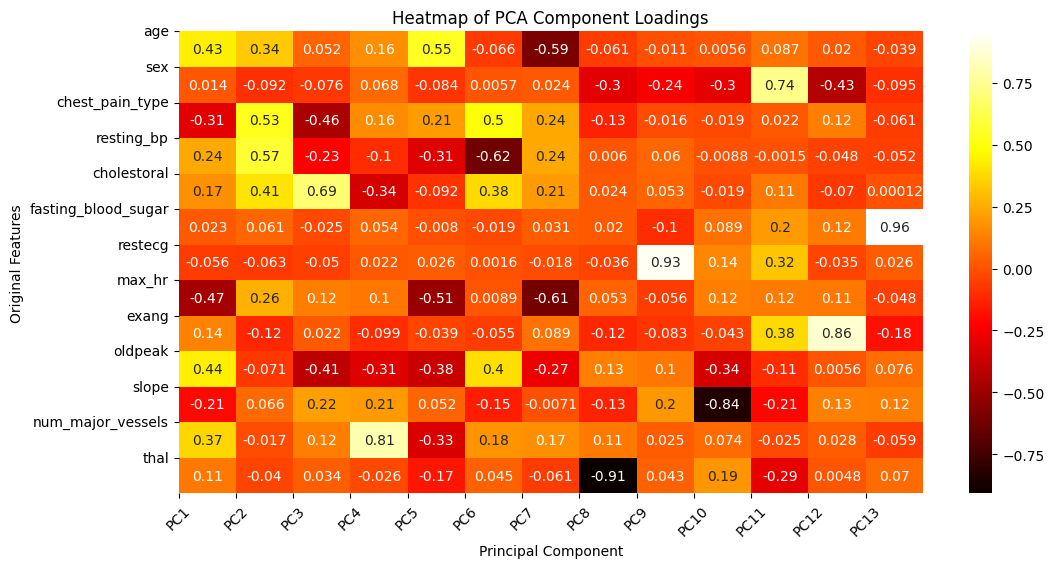

In [6]:
# 3. 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Scatter Plot of PCA')
plt.show()

# 4. Pair Plot of the first few principal components with target
sns.pairplot(pca_df, hue='Target', diag_kind='kde')
plt.suptitle('Pair Plot of First Four Principal Components with Target', y=1.02)
plt.show()

# 5. Heatmap of Component Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca.components_.T, cmap='hot', annot=True)
plt.yticks(range(len(X.columns)), X.columns, rotation=0)
plt.xticks(range(X_pca.shape[1]), [f'PC{i+1}' for i in range(X_pca.shape[1])], rotation=45)
plt.title('Heatmap of PCA Component Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Original Features')
plt.show()

Mean Squared Error (MSE): 0.13114754098360656
Root Mean Squared Error (RMSE): 0.3621429841700741
R-squared (R2) Score: 0.47413793103448276


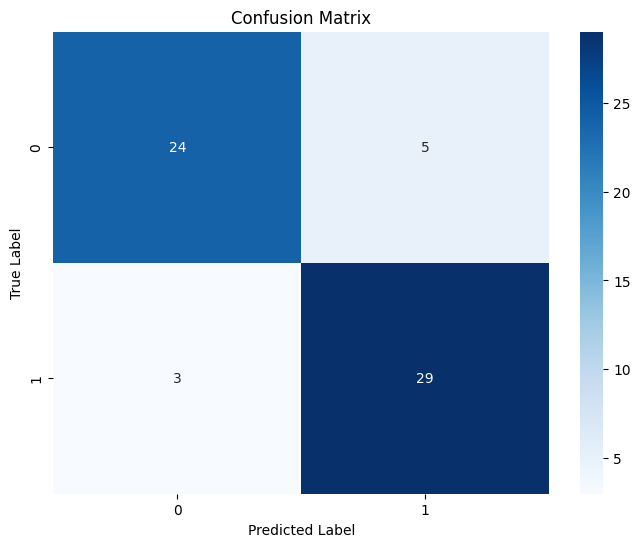

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('target', axis=1)  
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
# You can adjust the number of neighbors (n_neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
accuracy_percentage = accuracy * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




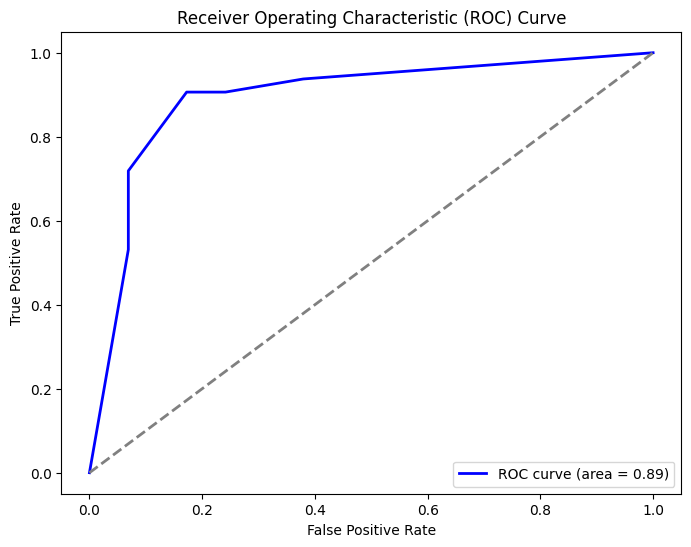

Accuracy: 86.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [8]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation results
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)

Mean Squared Error (MSE): 0.14754098360655737
Root Mean Squared Error (RMSE): 0.3841106397986879
R-squared (R2) Score: 0.40840517241379315


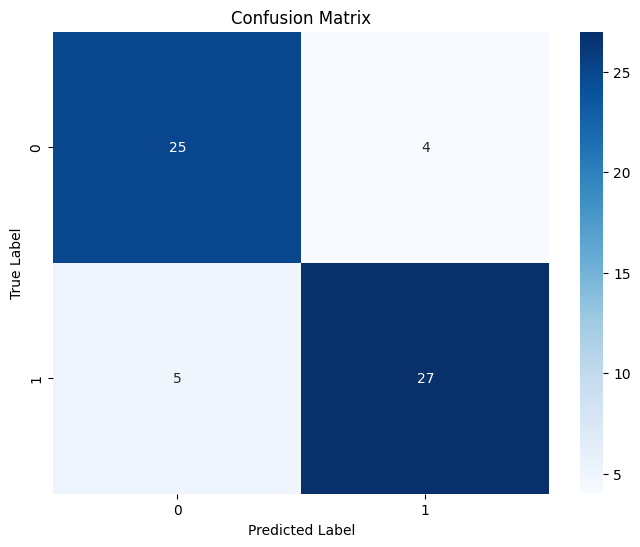

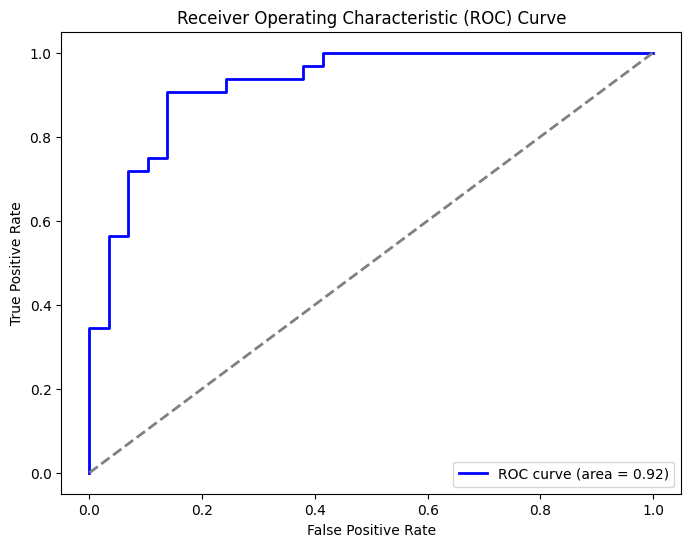

Accuracy: 85.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('target', axis=1) 
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
accuracy_percentage = accuracy * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation results
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)


R-squared (R2) Score: 0.34267241379310354
Mean Squared Error (MSE): 0.16393442622950818
Root Mean Squared Error (RMSE): 0.40488816508945796


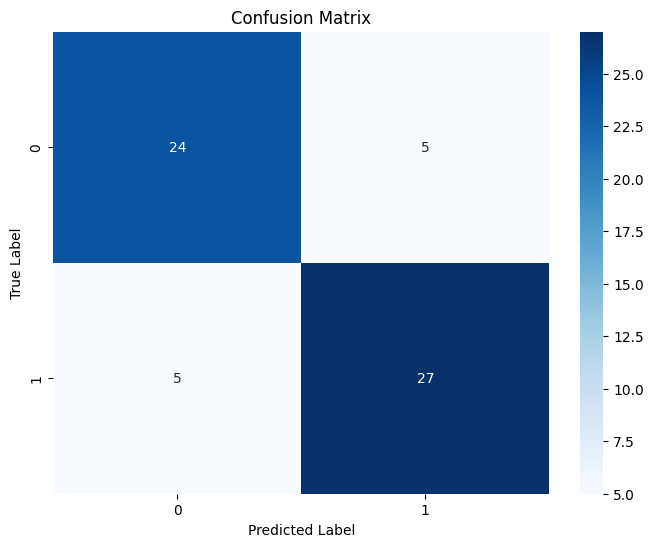

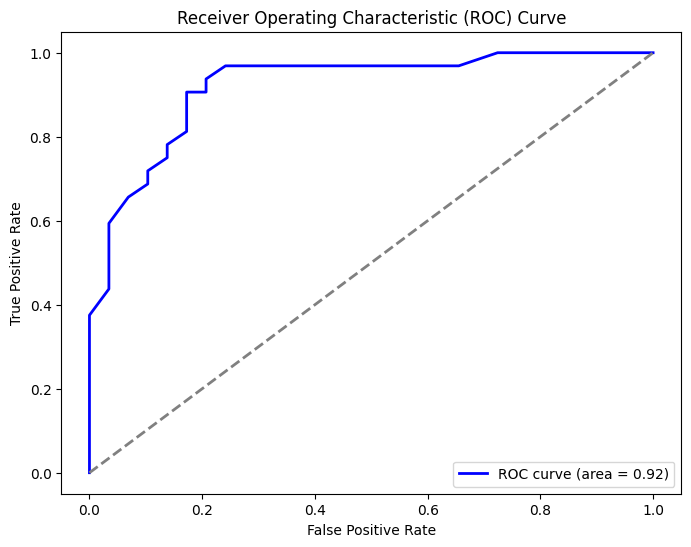

Accuracy: 83.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [10]:
from numpy import sqrt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = data.drop('target', axis=1)  # Assuming 'target' is the name of your target variable
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate accuracy in percentage
accuracy_percentage = accuracy * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation results
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(report)


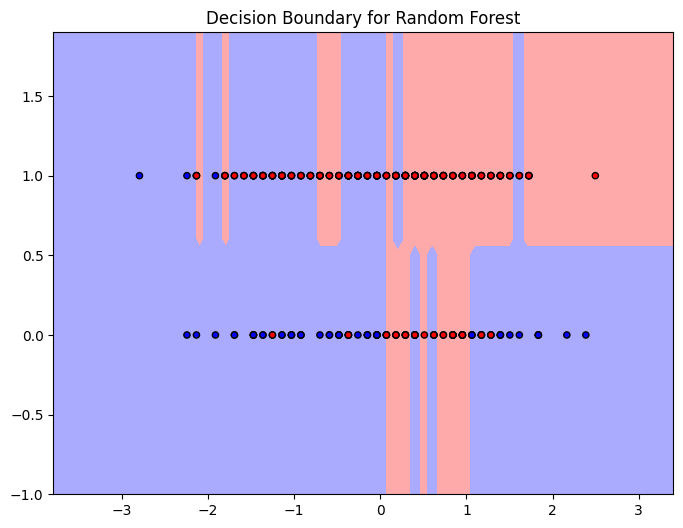

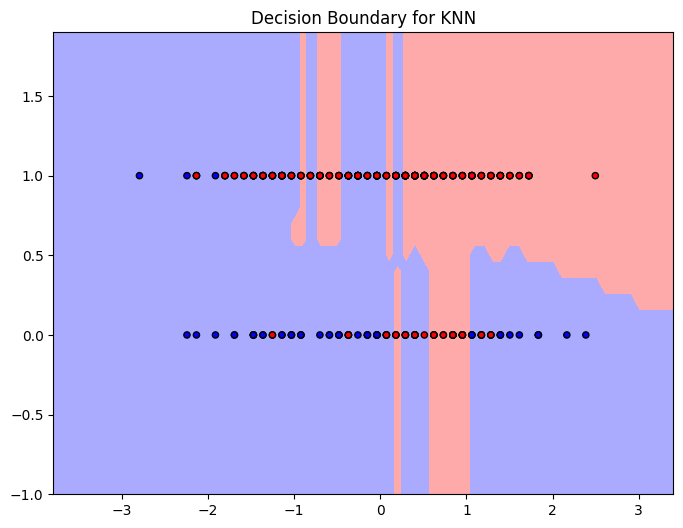

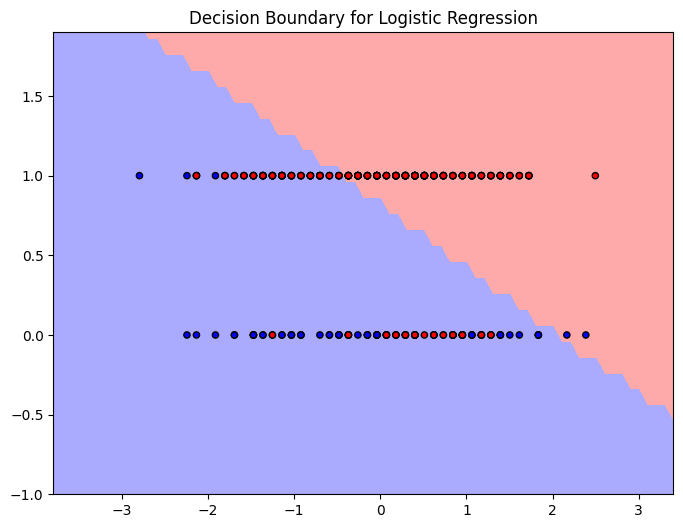

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


# Selecting the first two features for simplicity
X = data.iloc[:, :2].values
y = data['target'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression()

rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Plotting decision boundaries
plot_decision_boundary(rf, X, y, 'Decision Boundary for Random Forest')
plot_decision_boundary(knn, X, y, 'Decision Boundary for KNN')
plot_decision_boundary(log_reg, X, y, 'Decision Boundary for Logistic Regression')

plt.show()
